<a href="https://colab.research.google.com/github/fatin39/Titanic_ML/blob/main/SSK4604_Supervised_Learning_(206006).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from google.colab import files

In [ ]:
# Upload the CSV file
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
# Read the uploaded CSV file "titanic.csv" into a DataFrame
file_name = "titanic.csv"
df = pd.read_csv("titanic.csv")

# DATA EXPLORATION
# Display the first 5 dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So there's missing values for Age, Cabin, and Embarked column

**Pre-Processing**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('titanic.csv')

# Identify features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Define features with missing values
missing_features = ['Age', 'Cabin', 'Embarked']

# Impute missing values
numeric_features = ['Age']
categorical_features = ['Cabin', 'Embarked']

# Impute missing values in numeric features with mean
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Impute missing values in categorical features with a constant value
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Use preprocessor to transform the data
X_transformed = preprocessor.fit_transform(X)

# Check for missing values after preprocessing
missing_values_after_preprocessing = pd.DataFrame(X_transformed).isnull().sum()

# Display the number of missing values for each column
print("Missing Values After Preprocessing:")
print(missing_values_after_preprocessing)


Missing Values After Preprocessing:
0    0
dtype: int64


**EDA**

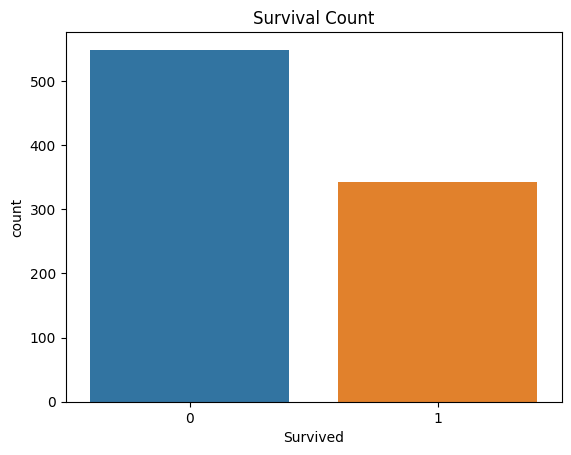

In [ ]:
# EDA - How many Survived?
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

It is evident that not many passengers survived the accident.

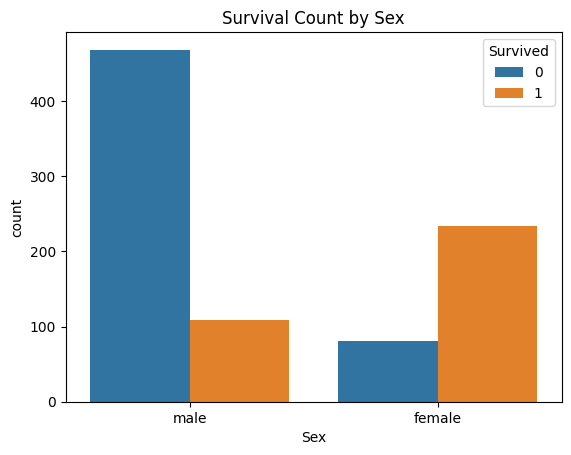

In [ ]:
# Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()


The survival rates for a women on the ship is around 75% while that for men in around 18-19%


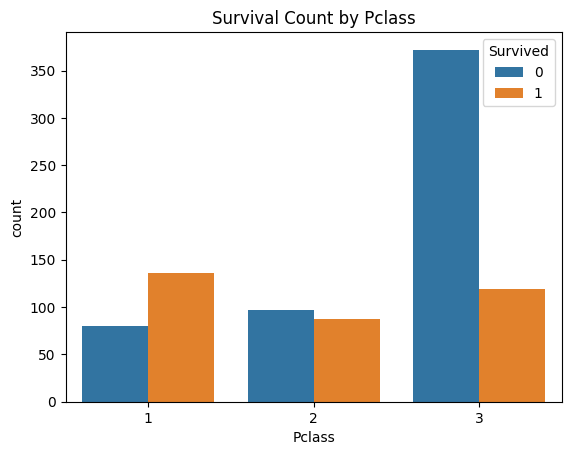

In [ ]:
# Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Pclass')
plt.show()


Pclass 1% survived is approximately 63%, while Pclass2 is approximately 48%. Even though the number of passengers in Pclass 3 was far higher, their survival rate was still quite poor, somewhere about 25%. Therefore money and status in society are important.



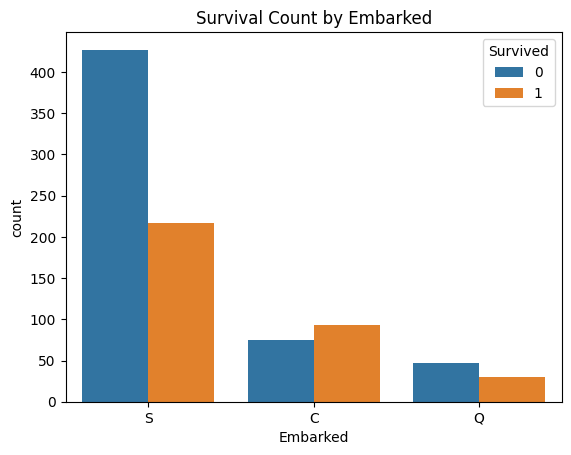

In [ ]:
# Embarked
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked')
plt.show()

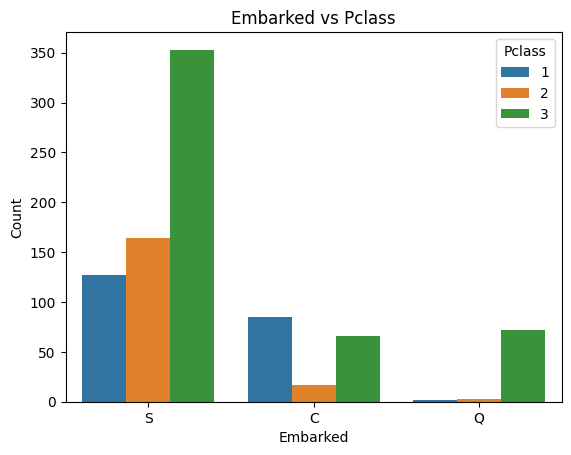

In [ ]:
# Countplot for Embarked vs Pclass
sns.countplot(x='Embarked', hue='Pclass', data=df)
plt.title('Embarked vs Pclass')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

Port C has the best chance of survival, while Port S has the worst. This is due to the fact that the majority of people in Port C are from Pclass 1.

The Embark S looks to the port where the majority of the wealthy passengers boarded. Still, the chances of survival are slim, as many as 81% of Pclass3 passengers did not survive.

The vast majority of travellers at Port Q belonged to Pclass3.

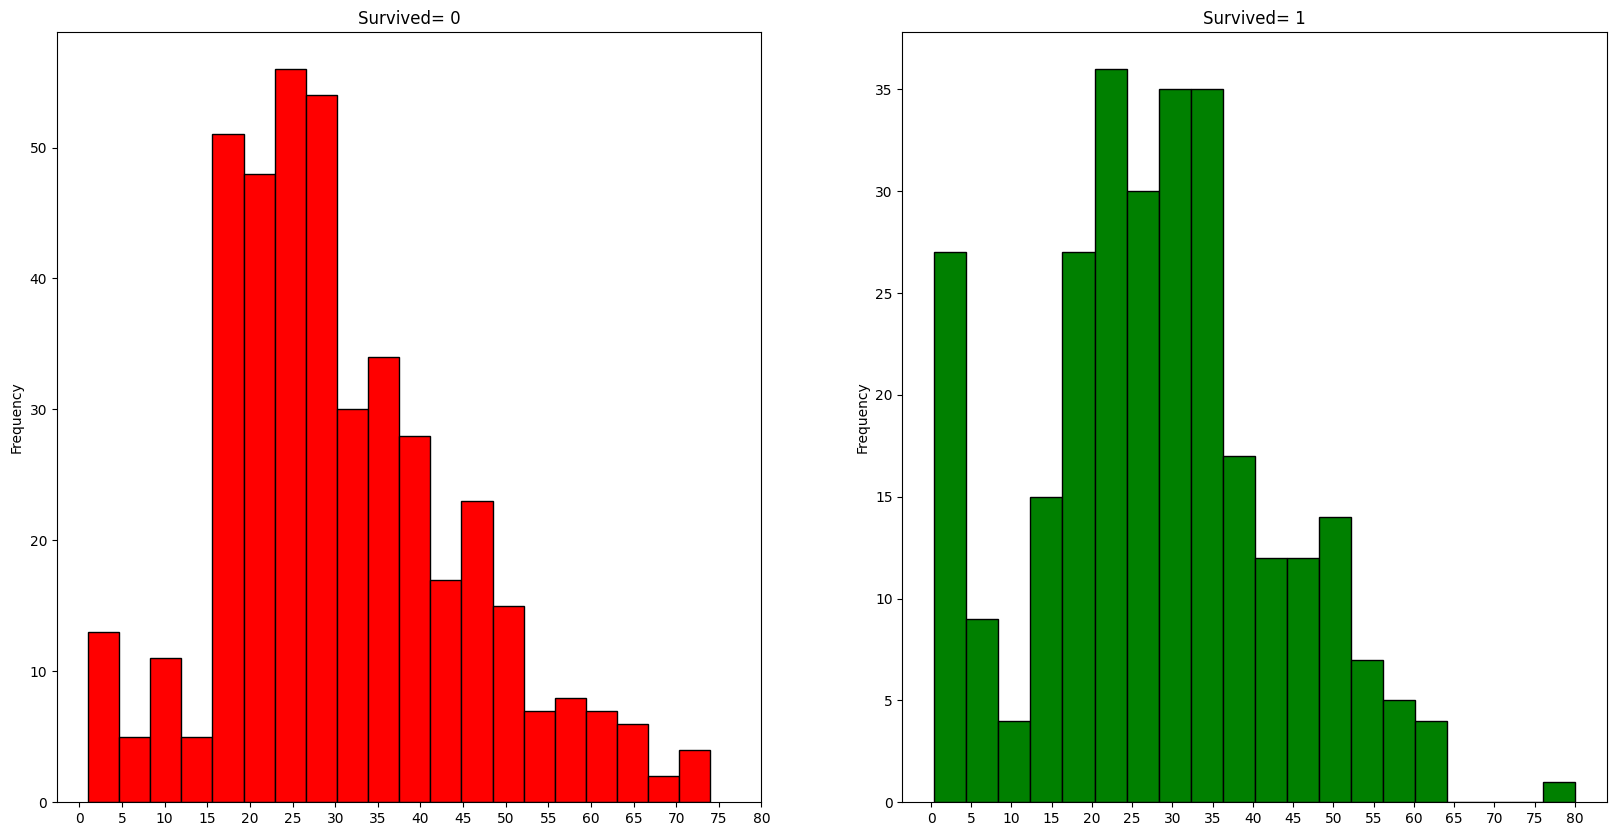

In [ ]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Histogram for Age, Survived = 0
df[df['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

# Histogram for Age, Survived = 1
df[df['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived= 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

A considerable number of toddlers (age 5) were spared (The Women and Children First Policy).

The oldest passenger (80 years old) was saved.

The age group 30-40 had the highest number of deaths.

Classifier: Logistic Regression
Accuracy: 0.804
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



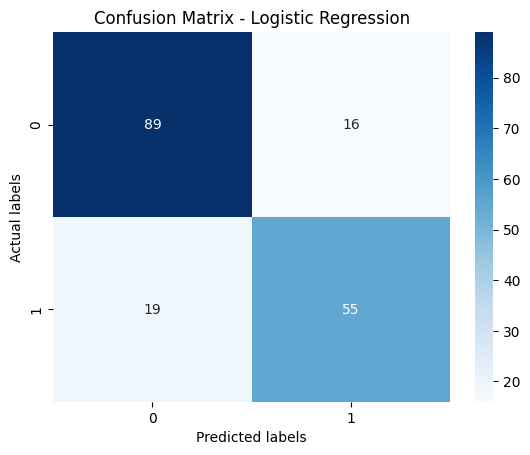



Classifier: Random Forest
Accuracy: 0.793
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



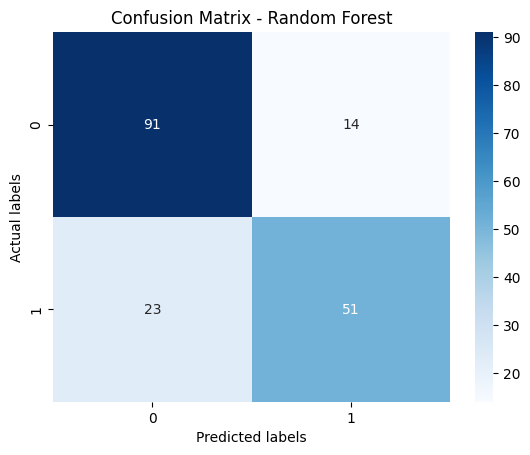

In [ ]:
# Identify features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define features with missing values
missing_features = ['Age', 'Cabin', 'Embarked']

# Define preprocessing for numeric features
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features
categorical_features = ['Cabin', 'Embarked', 'Sex', 'Pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipelines for each algorithm
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', LogisticRegression(random_state=42))])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])

# Train and evaluate each classifier
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Evaluate the classifier and print the results
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy:.3f}")

    # Classification Report
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {clf_name}")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()
    print('\n')


Both models have reasonably high accuracy, indicating their overall effectiveness in predicting survival.

Logistic Regression has a slightly higher accuracy (80.4%) compared to Random Forest (79.3%), which might be the best Machine Learning Algorithm in this case if high accuracy is a critical factor for the problem.